In [44]:
# Lägg till bibliotek
import matplotlib.pyplot as plt #plot
import matplotlib.animation as animation #animaation
import numpy as np
from scipy.integrate import solve_ivp

L1 = 1.0
L2 = 1.0
L = 2.0
k = 10.0
m1 = 1.0
m2 = 2.0
g = 9.82

konsts = (L1, L2, L, k, m1, m2, g)

In [45]:

def calcvalues(O1, O2, L1, L2, L, k, m1, m2, g):
    deltaH = L1*np.cos(O1) - L2*np.cos(O2)
    deltaX = L1*(1 - np.sin(O1)) + L2*(1 + np.sin(O2))

    alpha = np.arctan(deltaH/deltaX)
    L3 = np.sqrt(deltaH**2 + deltaX**2)

    deltaL = L - L3
    Fk = k*deltaL
    beta1 = O1 - alpha
    beta2 = O2 - alpha

    return Fk, beta1, beta2

In [46]:
def calcmovements(t, u, L1, L2, L, k, m1, m2, g):
    u1, u2, u3, u4 = u
    Fk, beta1, beta2 = calcvalues(u1, u3, L1, L2, L, k, m1, m2, g)
    u1_dot = u2
    u2_dot = (Fk*np.cos(beta2) - m2*g*np.sin(u1))/(m2*2*np.pi)
    u3_dot = u4
    u4_dot = (Fk*np.cos(beta2) - m1*g*np.sin(u2))/(m1*2*np.pi)
    return np.array([u1_dot, u2_dot, u3_dot, u4_dot])

In [47]:
u_0 = np.array([-np.pi/8, 0, np.pi/6, 0])

# Simuleringstid
t_span = (0,10)
t_eval = np.linspace(0, 10, 1000)
# Integrationsparametrar
# ODE-lösaren
sol = solve_ivp(calcmovements, t_span, u_0, method = 'RK45', t_eval =
t_eval, args=konsts, rtol = 1e-4, atol = 1e-4)

In [48]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e-02 ...  9.990e+00  1.000e+01]
        y: [[-3.927e-01 -3.927e-01 ... -2.372e-01 -2.439e-01]
            [ 0.000e+00 -1.755e-04 ... -6.697e-01 -6.653e-01]
            [ 5.236e-01  5.235e-01 ... -1.289e+01 -1.289e+01]
            [ 0.000e+00 -1.232e-02 ...  8.681e-02  9.766e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 170
     njev: 0
      nlu: 0

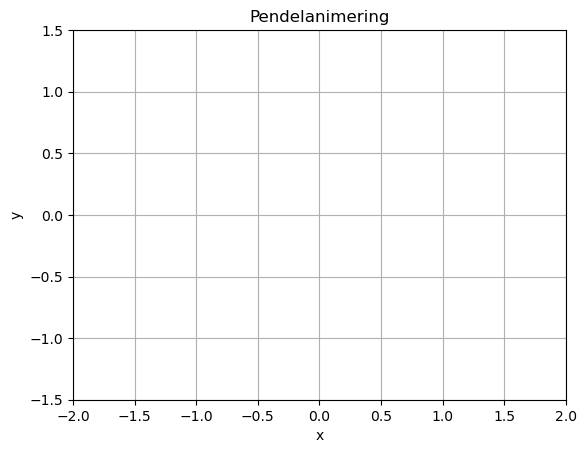

In [50]:
# Vinklar får från simulering
theta1 = sol.y[0]
theta2 = sol.y[2]

# Positioner för massorna fås från vinklar och parametrar
x1 = L1*(np.sin(theta1) - 1)
y1 = L1*(np.cos(theta1) - 1)
x2 = L2*(np.sin(theta2) + 1)
y2 = L2*(np.cos(theta2) - 1)

# Skapa figur och axlar
fig=plt.figure()
ax = plt.axes(xlim = (-(L1+L2), (L1+L2)),ylim = (-3/4*(L1+L2), 3/4*(L1+L2)))
ax.set_aspect('equal')
ax.grid()
# Linjer för pendlarna
line1, = ax.plot([], [], lw=2, color = 'blue', marker='o', markersize=8)
line2, = ax.plot([], [], lw=2, color = 'blue', marker='o', markersize=8)
line3, = ax.plot([], [], lw=2, color = 'red', marker='o', markersize=8)
# Initialisering av linjer för animering
def init():
    line1.set_data([], []) #Pendel 1
    line2.set_data([], []) #Pendel 2
    line3.set_data([], []) #Fjäder
    return line1, line2, line3
# Animeringsfunktion
def animate(i):
    # Koordinater
    x1_coords = [-L1, x1[i]] #Massa 1
    y1_coords = [0, y1[i]]
    x2_coords = [L2, x2[i]] #Massa 2
    y2_coords = [0, y2[i]]
    x3_coords = [x1[i], x2[i]] #Fjädern
    y3_coords = [y1[i], y2[i]]
    #Linjer
    line1.set_data(x1_coords, y1_coords)
    line2.set_data(x2_coords, y2_coords)
    line3.set_data(x3_coords, y3_coords)
    return line1, line2, line3
# Skapa animering
anim = animation.FuncAnimation(fig, animate, frames=len(t_eval),
init_func=init, blit=True, interval=20)
plt.title('Pendelanimering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()